In [3]:
# Import Liberaries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams 
rcParams['figure.figsize'] = 15, 16
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("Train.csv")

In [5]:
# Check Data Types
print(data.dtypes)

ID           int64
Datetime    object
Count        int64
dtype: object


In [6]:
# Coverting to Datetime format
data['Datetime'] = pd.to_datetime(data.Datetime, format='%d-%m-%Y %H:%M')

In [7]:
# Start and end date for dataset
data['Datetime'].min()
data['Datetime'].max()

Timestamp('2014-09-25 23:00:00')

In [8]:
# Creating new features of date
data['year'] = data.Datetime.dt.year
data['month']=data.Datetime.dt.month 
data['day']=data.Datetime.dt.day
data['Hour']=data.Datetime.dt.hour

In [9]:
# weekend variable
data['day of week'] = data['Datetime'].dt.dayofweek
temp = data['Datetime']

def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = data['Datetime'].apply(applyer)
data['weekend']=temp2

data.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [10]:
# indexing the Datetime to get the time period on the x-axis
data.index = data['Datetime']   
# drop ID variable to get only the Datetime on x-axis
data.drop('ID', axis = 1, inplace = True) 

## chnages here

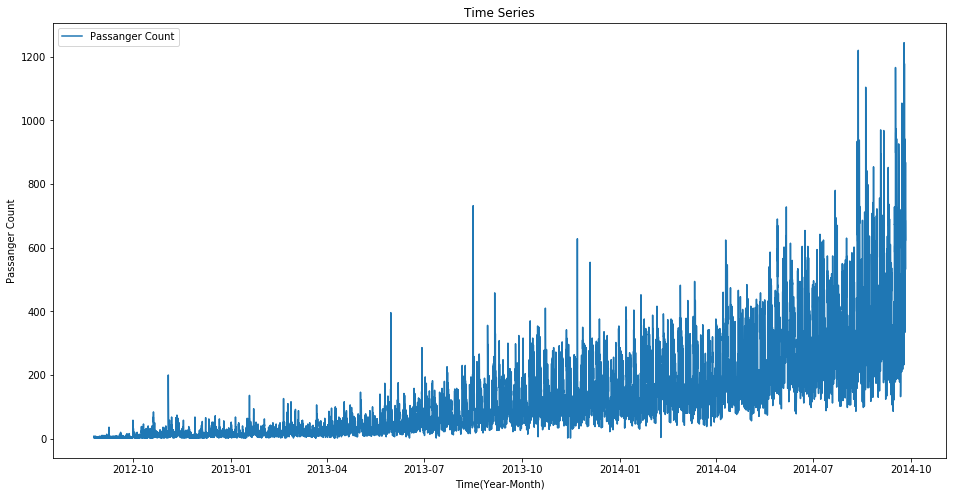

In [61]:
ts = data['Count']

# Plot the graph for Count
plt.figure(figsize = (16, 8))
plt.plot(ts, label = 'Passanger Count')
plt.title('Time Series')
plt.xlabel("Time(Year-Month)")
plt.ylabel("Passanger Count")
plt.legend(loc = 'best')

In [34]:
# Function for checking stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
     #Determing rolling statistics
     rollmean = pd.Series.rolling(timeseries, 24).mean()
     rollstd = pd.Series.rolling(timeseries, 24).std()
     
     #Plot rolling statistics:
     orig = plt.plot(timeseries, color='blue', label='Original')
     mean = plt.plot(rollmean, color='red', label='Rollig Mean')
     std = plt.plot(rollstd, color = 'black', label='Rolling Std')
     plt.legend(loc='best')
     plt.title('Rolling Mean & Standard Deviation')
     plt.show(block=False)
    
     #Perform Dickey-Fuller test:
     print('Results of Dickey-Fuller Test:')
     dftest = adfuller(timeseries, autolag = 'AIC')
     
     dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', 
                          '#Lags Used', 'No of Observations Used'])
     
     for key,value in dftest[4].items():
          dfoutput['Critical Value (%s)'%key] = value
     print(dfoutput)

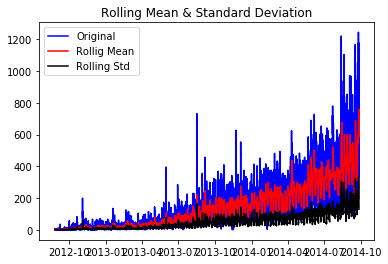

Results of Dickey-Fuller Test:
Test Statistics               -4.456561
p-value                        0.000235
#Lags Used                    45.000000
No of Observations Used    18242.000000
Critical Value (10%)          -2.566854
Critical Value (5%)           -2.861698
Critical Value (1%)           -3.430709
dtype: float64


In [12]:
test_stationarity(ts)

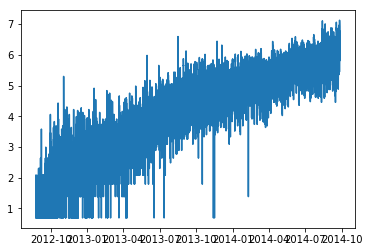

In [13]:
'''Make a Time Series Stationary'''
#Estimating & Eliminating Trend

ts_log = np.log(ts)
plt.plot(ts_log)


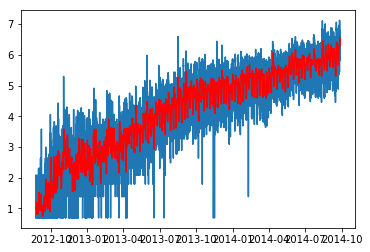

In [14]:
# Moving Average
moving_avg = pd.Series.rolling(ts_log, 24).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color = 'red')

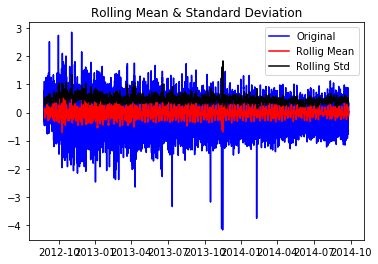

Results of Dickey-Fuller Test:
Test Statistics              -21.316940
p-value                        0.000000
#Lags Used                    45.000000
No of Observations Used    18219.000000
Critical Value (10%)          -2.566854
Critical Value (5%)           -2.861699
Critical Value (1%)           -3.430709
dtype: float64


In [15]:
# Difference between moving average and ts_log
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(24)

ts_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(ts_log_moving_avg_diff)


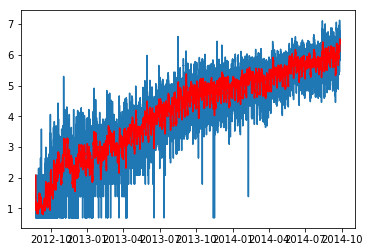

In [16]:
# Exponential Weighted avg
expwighted_avg = pd.Series.ewm(ts_log, halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')


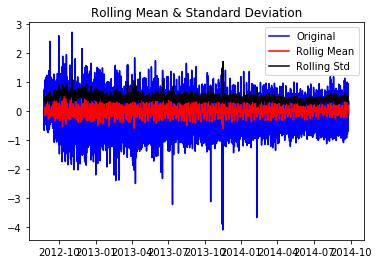

Results of Dickey-Fuller Test:
Test Statistics              -21.006745
p-value                        0.000000
#Lags Used                    45.000000
No of Observations Used    18242.000000
Critical Value (10%)          -2.566854
Critical Value (5%)           -2.861698
Critical Value (1%)           -3.430709
dtype: float64


In [17]:
# Difference exp weighted and ts_log
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

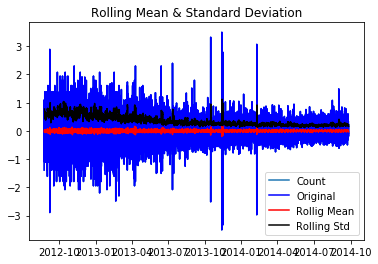

Results of Dickey-Fuller Test:
Test Statistics              -32.041628
p-value                        0.000000
#Lags Used                    45.000000
No of Observations Used    18241.000000
Critical Value (10%)          -2.566854
Critical Value (5%)           -2.861698
Critical Value (1%)           -3.430709
dtype: float64


In [18]:
# Differencing
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

ts_log_diff.dropna(inplace= True)
test_stationarity(ts_log_diff)

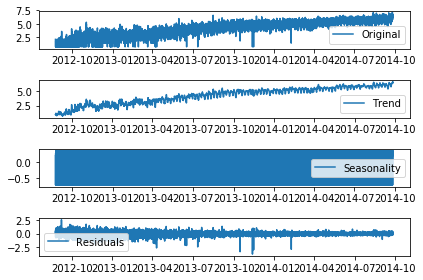

In [19]:
# Decomposing

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')


plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()


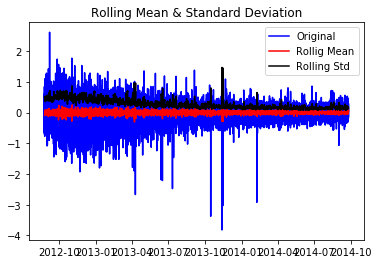

Results of Dickey-Fuller Test:
Test Statistics              -32.205683
p-value                        0.000000
#Lags Used                    45.000000
No of Observations Used    18218.000000
Critical Value (10%)          -2.566854
Critical Value (5%)           -2.861699
Critical Value (1%)           -3.430709
dtype: float64


In [20]:
# Check Stationarity of Residuals
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

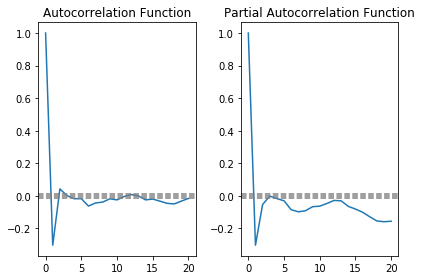

In [21]:

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags = 20)
lag_pacf = pacf(ts_log_diff, nlags = 20, method = 'ols')

# plot acf

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()



Text(0.5, 1.0, 'RSS 2710.3534')

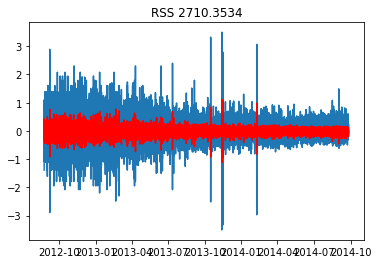

In [22]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order = (2,1,0))
results_AR = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))


Text(0.5, 1.0, 'RSS: 2710.6481')

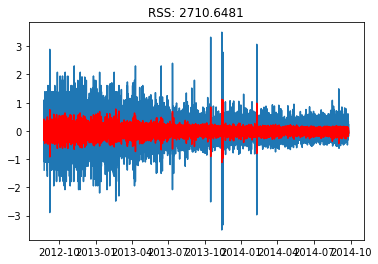

In [23]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))



Text(0.5, 1.0, 'RSS: 2528.4698')

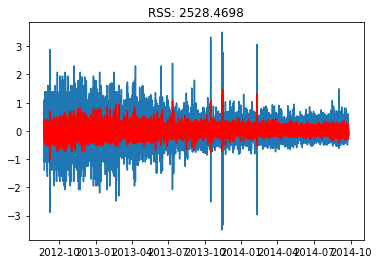

In [24]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))


In [25]:
#Taking it back to original scale

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head)


<bound method NDFrame.head of Datetime
2012-08-25 01:00:00    0.000278
2012-08-25 02:00:00    0.420315
2012-08-25 03:00:00   -0.267647
2012-08-25 04:00:00    0.364019
2012-08-25 05:00:00    0.088419
2012-08-25 06:00:00    0.098661
2012-08-25 07:00:00    0.092032
2012-08-25 08:00:00    0.087107
2012-08-25 09:00:00   -0.295356
2012-08-25 10:00:00    0.336088
2012-08-25 11:00:00    0.069665
2012-08-25 12:00:00   -0.303499
2012-08-25 13:00:00    0.087776
2012-08-25 14:00:00    0.228379
2012-08-25 15:00:00   -0.314689
2012-08-25 16:00:00    0.335345
2012-08-25 17:00:00    0.071860
2012-08-25 18:00:00    0.084947
2012-08-25 19:00:00    0.081122
2012-08-25 20:00:00    0.078545
2012-08-25 21:00:00    0.076073
2012-08-25 22:00:00   -0.327077
2012-08-25 23:00:00    0.320724
2012-08-26 00:00:00    0.060712
2012-08-26 01:00:00   -0.180128
2012-08-26 02:00:00   -0.176445
2012-08-26 03:00:00    0.311670
2012-08-26 04:00:00   -0.193566
2012-08-26 05:00:00    0.232000
2012-08-26 06:00:00    0.067174
 

In [26]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head)


<bound method NDFrame.head of Datetime
2012-08-25 01:00:00    0.000278
2012-08-25 02:00:00    0.420593
2012-08-25 03:00:00    0.152946
2012-08-25 04:00:00    0.516964
2012-08-25 05:00:00    0.605383
2012-08-25 06:00:00    0.704044
2012-08-25 07:00:00    0.796077
2012-08-25 08:00:00    0.883184
2012-08-25 09:00:00    0.587827
2012-08-25 10:00:00    0.923915
2012-08-25 11:00:00    0.993580
2012-08-25 12:00:00    0.690081
2012-08-25 13:00:00    0.777857
2012-08-25 14:00:00    1.006236
2012-08-25 15:00:00    0.691547
2012-08-25 16:00:00    1.026892
2012-08-25 17:00:00    1.098752
2012-08-25 18:00:00    1.183699
2012-08-25 19:00:00    1.264821
2012-08-25 20:00:00    1.343366
2012-08-25 21:00:00    1.419439
2012-08-25 22:00:00    1.092362
2012-08-25 23:00:00    1.413085
2012-08-26 00:00:00    1.473798
2012-08-26 01:00:00    1.293669
2012-08-26 02:00:00    1.117224
2012-08-26 03:00:00    1.428894
2012-08-26 04:00:00    1.235328
2012-08-26 05:00:00    1.467328
2012-08-26 06:00:00    1.534502
 

In [27]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()


Datetime
2012-08-25 00:00:00    2.079442
2012-08-25 01:00:00    2.079719
2012-08-25 02:00:00    2.500035
2012-08-25 03:00:00    2.232387
2012-08-25 04:00:00    2.596406
dtype: float64